In [ ]:
# contour from gimp.vectorlib or cv2
# sobel
# semseg
# 

jpg_files = [
    "frame_6825.jpg", "frame_6826.jpg", "frame_6827.jpg", "frame_6828.jpg", 
    "frame_6829.jpg", "frame_6830.jpg", "frame_6832.jpg", "frame_6833.jpg", 
    "frame_6834.jpg"
]






svg_urls = [
    "https://shels-macbook-pro.jerboa-kokanue.ts.net/static/lottie/frame_6831.svg"
]





def download_files(urls):
    [os.system(f'wget {url}') for url in urls]




for _ in jpg_files: download_files("https://shels-macbook-pro.jerboa-kokanue.ts.net/static/lottie/" + _ )

In [ ]:
! wget  "https://shels-macbook-pro.jerboa-kokanue.ts.net/ls/static/lottie"

In [8]:
! git commit -am 'asdfaf yay'

! git pull origin HEAD

[main 4b687ec2] asdfaf yay
 3 files changed, 790 insertions(+), 5 deletions(-)
remote: Enumerating objects: 743, done.
remote: Counting objects: 100% (743/743), done.
remote: Compressing objects: 100% (480/480), done.
remote: Total 743 (delta 228), reused 742 (delta 227), pack-reused 0 (from 0)
Receiving objects: 100% (743/743), 89.55 MiB | 12.17 MiB/s, done.
Resolving deltas: 100% (228/228), completed with 18 local objects.
From github.com:adnanwahab/hashirama-private
 * branch              HEAD       -> FETCH_HEAD
Successfully rebased and updated refs/heads/main.


In [12]:
import os 

_ = os.listdir("../homelab-status-page/static/")
_

['demos',
 'Screenshot 2024-09-30 at 5.24.06\u202fPM.png',
 'live-kit-uploader',
 'latent-scope',
 'data',
 'Sitemap.xml',
 'obs3-breakout',
 'alan_kay',
 'webcam.jpg',
 'assets',
 'animated.gif',
 'js',
 'obs_landing',
 'images',
 'live-kit-client',
 'pdfs',
 'external',
 'sensor_data',
 '.well-known',
 'fonts',
 'css']

In [23]:

# import json
# from lottie import objects
# import os

# # Paths to the SVG files
# svg_files = [

# ]


import os
import json
from svgpathtools import svg2paths
from lottie import objects

# Load and parse SVG paths
def load_svg_paths(svg_file):
    paths, attributes = svg2paths(svg_file)
    return paths, attributes

# Convert SVG paths to Lottie shapes
def svg_path_to_lottie_shape(svg_paths):
    lottie_shapes = []
    for path in svg_paths:
        lottie_shape = objects.Shape()
        for segment in path:
            if segment.__class__.__name__ == "Line":
                lottie_shape.add_command(
                    objects.commands.MoveTo(segment.start.real, segment.start.imag)
                )
                lottie_shape.add_command(
                    objects.commands.LineTo(segment.end.real, segment.end.imag)
                )
            # Add other path segment types as needed, e.g., CubicBezier, QuadraticBezier, etc.
        lottie_shapes.append(lottie_shape)
    return lottie_shapes

 
 
an = objects.Animation(59)
 
layer = objects.ShapeLayer()
an.add_layer(layer)
 



import os
import json
from svgpathtools import svg2paths
from lottie import objects
from lottie.exporters import export_lottie  # Corrected import for exporting
Point = lottie.Point


Color = lottie.Color
# Load and parse SVG paths
def load_svg_paths(svg_file):
    paths, attributes = svg2paths(svg_file)
    return paths, attributes
#objects.Path()
# Convert SVG paths to Lottie shapes
def svg_path_to_lottie_shape(svg_paths):
    lottie_shapes = []
     
    an = objects.Animation(59)
     
    layer = objects.ShapeLayer()
    an.add_layer(layer)
    for path in svg_paths:
        bez = objects.Path() # this is a path in one frame
        layer.add_shape(bez)
        for segment in path:
            #print(segment.__class__.__name__)
            if segment.__class__.__name__ == "Line":
                #print("cool", segment)
                #layer.add_shape(segment)
                bez.shape.value.add_point(Point(256, 128), Point(0, 0), Point(64, 64))
                bez.shape.value.add_point(Point(256, 256), Point(-64, -64), Point(-64, 64))
                bez.shape.value.add_point(Point(256, 256+120), Point(0, 0), Point(0, 0))
                layer.add_shape(objects.Stroke(Color(1, 0, 0), 10))
     
      # Add other path segment types as needed, e.g., CubicBezier, QuadraticBezier, etc.
        lottie_shapes.append(lottie_shape)
    return lottie_shapes, an


# Create Lottie animation from multiple SVGs
def create_lottie_from_svgs(svg_files, output_file):
    lottie_animation = objects.Animation()
    for i, svg_file in enumerate(svg_files):
        paths, _ = load_svg_paths(svg_file)
        lottie_shapes = svg_path_to_lottie_shape(paths)

        layer = objects.ShapeLayer()
        #layer.shapes[0].add_keyframe(i * 5, )
        layer.add_shape(lottie_shapes)
        lottie_animation.add_layer(layer)

    # Export Lottie animation to a file
    #export_file(lottie_animation, output_file)
    print(lottie_animation)
    print(f"Lottie animation saved to {output_file}")
    return lottie_animation

# Run the script with your SVG files
#svg_directory = 'svg/'  # Directory containing SVG files
svg_directory  = "../homelab-status-page/static/lottie"#os.listdir()

svg_files = [os.path.join(svg_directory, f) for f in os.listdir(svg_directory) if f.endswith('.svg')]
output_file = 'lottie_animation.json'
#layer.add_shape
output = create_lottie_from_svgs(svg_files, output_file)


# Creating a Lottie object with 5 layers from SVGs
layers = []
for i, svg_path in enumerate(svg_files):
    # Create a shape layer for each SVG
    shape_layer = objects.ShapeLayer(
        shapes=[objects.VectorShape(d=svg_path)],  # Normally this would be the actual SVG path data
        name=f"Layer {i+1}",
        opacity=100,
        rotation=0,
    )
    layers.append(shape_layer)

# Create the Lottie animation
animation = objects.Animation(
    layers=layers,
    width=500,
    height=500,
    frame_rate=30,
    in_point=0,
    out_point=120
)

# Export the Lottie animation to JSON
lottie_json = export.to_json(animation)

# Save the resulting Lottie JSON to a file
output_file_path = "/mnt/data/lottie_animation.json"
with open(output_file_path, 'w') as f:
    json.dump(lottie_json, f)


NameError: name 'lottie_shape' is not defined

In [21]:
lottie.Point

<function lottie.nvector.Point(x, y)>

In [5]:
import cv2
import os
import requests
import logging
from tqdm import tqdm

# URL of the video

input_dir = '/home/adnan/hashirama/services/perception/youtube/mp4_content/'
video_url = "https://files.hashirama.blog/youtube/mp4_content/Ouran%20%20When%20they%20figured%20out%20Haruhi%20was%20a%20girl.mp4"
video_filename = "downloaded_video.mp4"

# Directory to save frames
output_dir = "./frames"
os.makedirs(output_dir, exist_ok=True)

# Configure logging
logging.basicConfig(level=logging.INFO)

# Split video into frames without a while loop and with progress bar and logs
def split_video_into_frames(video_path, output_dir):
    video_capture = cv2.VideoCapture(video_path)

    # Get total number of frames
    total_frames = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))

    # Iterate over all frames using a for loop with tqdm for progress tracking
    for frame_index in tqdm(range(total_frames), desc="Extracting frames"):
        ret, frame = video_capture.read()
        
        if not ret:
            logging.warning(f"Frame {frame_index} could not be read. Stopping.")
            break

        # Save each frame
        frame_filename = os.path.join(output_dir, f"frame_{frame_index:04d}.jpg")
        cv2.imwrite(frame_filename, frame)
        logging.info(f"Saved frame {frame_index} as {frame_filename}")

    video_capture.release()
    #logging.info(f"Extracted {frame_index + 1} frames into {output_dir}")

video_filename= 'ohshc__Finding_out_Haruhi_is_a_girl.mp4'
# Step 2: Split the downloaded video into frames
split_video_into_frames(input_dir+video_filename, output_dir)
print()

Extracting frames: 0it [00:00, ?it/s]


In [8]:
#! ls frames
! ffmpeg -i '/home/adnan/hashirama/services/perception/youtube/mp4_content/ohshc__Finding_out_Haruhi_is_a_girl.mp4' ./frames/frame_%04d.jpg

ffmpeg: error while loading shared libraries: libopenh264.so.5: cannot open shared object file: No such file or directory


In [7]:
input_dir+video_filename

'/home/adnan/hashirama/services/perception/youtube/mp4_content/ohshc__Finding_out_Haruhi_is_a_girl.mp4'

In [3]:
output_path

NameError: name 'output_path' is not defined

In [6]:
#! pip install pytubefix==7.2rc1 --upgrade
import cv2
import os
from pathlib import Path

def extract_frames(video_path, output_folder):
    # Open the video file
    video = cv2.VideoCapture(str(video_path))  # Convert Path object to string
    
    if not video.isOpened():
        print(f"Error: Could not open video: {video_path}")
        return

    # Create the output folder if it doesn't exist
    output_folder.mkdir(parents=True, exist_ok=True)

    frame_count = 0
    while True:
        # Read the next frame from the video
        success, frame = video.read()

        # If there are no more frames, break the loop
        if not success:
            break

        # Save the frame as an image file
        frame_path = output_folder / f"frame_{frame_count:05d}.jpg"
        cv2.imwrite(str(frame_path), frame)

        # Increment the frame count
        frame_count += 1

    # Release the video capture object
    video.release()
    print(f"Extracted {frame_count} frames to {output_folder}")

In [2]:
from pytubefix import YouTube, exceptions

SAVE_PATH = "./youtube/mp4_content/"

def download_yt(link):
    # try:
    #     yt = YouTube(link)
    # except exceptions.VideoUnavailable:
    #     print(f"The video {link} is unavailable.")
    #     return  # Exit the function
    # except Exception as e:
    #     print(f"Connection Error for {link}: {e}")
    #     return  # Exit the function if there's an error
    yt = YouTube(link)
    # # Proceed if no exceptions
    mp4_streams = yt.streams.filter(file_extension='mp4').all()

    if mp4_streams:
        d_video = mp4_streams[0]
        try:
            d_video.download(output_path=SAVE_PATH)
            print('Video downloaded successfully!')
        except Exception as e:
            print(f"Error occurred while downloading {link}: {e}")
    else:
        print(f"No mp4 streams available for {link}")

# Example usage
lightbulb = 'https://www.youtube.com/watch?v=oFuyONPEGAo&t=127s'
download_yt(lightbulb)
# use globs + path right - to simplify whatever

/tmp/ipykernel_2205541/3828005570.py:16: DeprecationWarning: Call to deprecated function all (This object can be treated as a list, all() is useless).
  mp4_streams = yt.streams.filter(file_extension='mp4').all()


Video downloaded successfully!


In [12]:
os.listdir(SAVE_PATH)

file_path = SAVE_PATH + 

['Make Templates with Essential Graphics in Adobe After Effects.mp4',
 'Rendering out of C4d Lite (55).mp4',
 'Brush Strokes - Adobe After Effects tutorial.mp4',
 'Why slicing a cone gives an ellipse (beautiful proof).mp4',
 'Flying Blobs to Liquid Letters - Adobe After Effects tutorial.mp4',
 'Using topology for discrete problems  The Borsuk-Ulam theorem and stolen necklaces.mp4',
 'Linear transformations and matrices  Chapter 3 Essence of linear algebra.mp4',
 'Whats so special about Eulers number e  Chapter 5 Essence of calculus.mp4',
 'Creating Depth with Layer Maps In After Effects and C4d.mp4',
 'Cramers rule explained geometrically  Chapter 12 Essence of linear algebra.mp4',
 'Pi hiding in prime regularities.mp4',
 'Combine 3D and 2D Scenes (with Ae & C4D).mp4',
 'The impossible chessboard puzzle.mp4',
 'Divergence and curl  The language of Maxwells equations fluid flow and more.mp4',
 'Extrude & Layer Text with RayTraced 3d - Adobe After Effects tutorial.mp4',
 'Simple Face Rig

In [13]:
#download_yt(lightbulb)

#yt = YouTube(lightbulb)
import os
os.listdir(SAVE_PATH) 
light = 'ohshc__Finding_out_Haruhi_is_a_girl"
#os.listdir(SAVE_PATH) 
#! mkdir cognition_engine
extract_frames( , "")

SyntaxError: unterminated string literal (detected at line 6) (4262886392.py, line 6)

In [14]:
SAVE_PATH + light

'./youtube/mp4_content/ohshc__Finding_out_Haruhi_is_a_girl.mp4'

In [ ]:
import cv2
import os
import requests

# URL of the video
video_url = "https://files.hashirama.blog/youtube/mp4_content/Ouran%20%20When%20they%20figured%20out%20Haruhi%20was%20a%20girl.mp4"
video_filename = "downloaded_video.mp4"

# Directory to save frames
output_dir = "./frames"
os.makedirs(output_dir, exist_ok=True)

# Download the video file
def download_video(url, output_path):
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(output_path, 'wb') as f:
            for chunk in response.iter_content(chunk_size=1024):
                if chunk:
                    f.write(chunk)
        print(f"Downloaded video to {output_path}")
    else:
        print("Failed to download the video")

# Split video into frames
def split_video_into_frames(video_path, output_dir):
    video_capture = cv2.VideoCapture(video_path)
    frame_count = 0

    while True:
        ret, frame = video_capture.read()
        if not ret:
            break  # Video is done
        
        # Save each frame
        frame_filename = os.path.join(output_dir, f"frame_{frame_count:04d}.jpg")
        cv2.imwrite(frame_filename, frame)
        frame_count += 1

    video_capture.release()
    print(f"Extracted {frame_count} frames into {output_dir}")

# Step 1: Download the video
#download_video(video_url, video_filename)
#tqdm
# Step 2: Split the downloaded video into frames
split_video_into_frames(video_filename, output_dir)

In [ ]:
output_dir

In [15]:
from pathlib import Path

file_path = Path('./youtube/mp4_content/ohshc__Finding_out_Haruhi_is_a_girl.mp4')

if file_path.is_file():
    print(f"{file_path} is a file.")
else:
    print(f"{file_path} is not a file.")


youtube/mp4_content/ohshc__Finding_out_Haruhi_is_a_girl.mp4 is not a file.


In [2]:
from typing import Tuple
# deliverables - steps of lesson
import os

from PIL import Image as PILImage
from IPython.display import display
import time
if False:
    mask_generate()

import library_functions
brown_blue_math_playists = [
    'https://www.youtube.com/watch?v=d-o3eB9sfls&list=PLZHQObOWTQDPHP40bzkb0TKLRPwQGAoC-',
'https://www.youtube.com/watch?v=fNk_zzaMoSs&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab',
'https://www.youtube.com/watch?v=WUvTyaaNkzM&list=PLZHQObOWTQDMsr9K-rj53DwVRMYO3t5Yr',
'https://www.youtube.com/watch?v=r6sGWTCMz2k&list=PLZHQObOWTQDN52m7Y21ePrTbvXkPaWVSg',
'https://www.youtube.com/watch?v=OkmNXy7er84&list=PLZHQObOWTQDMXMi3bUMThGdYqos36X_lA',
'https://www.youtube.com/watch?v=8rrHTtUzyZA&list=PLZHQObOWTQDMp_VZelDYjka8tnXNpXhzJ',
]
# output = replicate.run(
#     "zsxkib/yolo-world:d232445620610b78671a7f288f37bf3baec831537503e9064afcf0bfd0f0a151",
#     input={
#         "nms_thr": 0.5,
#         "score_thr": 0.05,
#         "class_names": "dog, eye, tongue, ear, leash, backpack, person, nose",
#         "input_media": "https://replicate.delivery/pbxt/KOJpWfZmaP6tUv8fqR2n0z3FdBhtytoP5llaecrvvez0p4LE/dog.jpeg",
#         "return_json": False,
#         "max_num_boxes": 100
#     }
# )

def create_animation(yt_link: str) -> Tuple[str, str]:
    """
    Takes a string and returns a tuple containing the file paths of a GIF and a Lottie file.
    """
    # Logic to create and return GIF and Lottie file paths
    return "path_to_gif.gif"
    return ("path_to_gif.gif", "path_to_lottie.json")

"ama kakeru ryu no hirameki"
def text_to_gif_lottie(prompt: str):
    return 10
apple = 'https://www.youtube.com/watch?v=cwCMV7LF6S4&t=3s'


#get data - pytbuefix
# test each function on test data
# glue together svg into lottie - > done


In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image as PILImage
from IPython.display import display
from IPython.display import SVG, display

# Path to your SVG file
svg_path = "output_image_improved.svg"

#from IPython.display import Image
#display("output_image_improved.svg")
#test_display = 'output_frames/ohshc__Finding_out_Haruhi_is_a_girl/frame_00428.jpg'
# Display image from a URL
#Image(url=test_display)
#test_display = 'output_frames/ohshc__Finding_out_Haruhi_is_a_girl/frame_00428.jpg'
# Open and display the image
#img = PILImage.open(test_display)
#display(img)


#fig, axs = plt.subplots(1, 2)  # Adjust to display more images

#first_movie = os.listdir('output_frames/')[0]
#! mv youtube/output_frames/* output_frames
#frames = os.listdir('output_frames/' + first_movie)

#a = f"output_frames/{first_movie}/{frames[0]}"
#b = f"output_frames/{first_movie}/{frames[2]}"

#shit = f"{a}/"
#shit
#img1 = mpimg.imread(a)
#img2 = mpimg.imread(b)
path_to_output = 'youtube/output_frames/'
test_dir = os.listdir(path_to_output)
test_dir

['Long Shadows (with the repeater) - Adobe After Effects tutorial',
 'Higher order derivatives  Chapter 10 Essence of calculus',
 'Extrude & Layer Text with RayTraced 3d - Adobe After Effects tutorial',
 'But what is a neural network  Chapter 1 Deep learning',
 'ohshc__Finding_out_Haruhi_is_a_girl',
 'Cartoon Gleam - Adobe After Effects tutorial',
 'Rendering out of C4d Lite (55)',
 'Why is pi here  And why is it squared  A geometric answer to the Basel problem',
 '50_Best_Motion_Logos__Cool_Logo_Animations__Adobe_Creative_Cloud',
 'Fractals are typically not self-similar',
 'Random Shapes in After Effects',
 'Working From Illustrator To After Effects - Adobe After Effects Tutorial',
 'Make Sequential Animations using the Repeater - Adobe After Effects tutorial',
 'The Wiggly Selector (Text Animator) - Adobe After Effects tutorial',
 'Pricing Motion Design',
 'Make Templates with Essential Graphics in Adobe After Effects',
 'Linear transformations and matrices  Chapter 3 Essence of lin

In [4]:
test_dir = path_to_output + "cone_to_ellipse/"
test_dir
os.listdir(test_dir)[0]

'frame_17363.jpg'

In [53]:
from pixels2svg import pixels2svg

import os
import cv2
import matplotlib.pyplot as plt
#https://github.com/mapbox/earcut
#https://news.ycombinator.com/item?id=41600177
# https://github.com/tdh8316/triangler
def _image_to_svg(image_path, i=0):
    # Load an image using OpenCV
    print(i)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale
    # Display the loaded image (optional)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    plt.show()
    # Save the SVG output to a file
    output_file = "output_2.svg"
    #from pixels2svg import pixels2svg

    # with open(output_file, "w") as file:
    #     file.write(svg_output)
    # print(f"SVG file saved as {output_file}")
    # Convert the image to SVG
    svg_output =  pixels2svg(image_path, f"output_{i}.svg")

    #svg_output = raster_to_svg(image, num_paths=100, path_size=1.0, error_threshold=0.1)
    # Print the SVG output to the console (optional)
    #print(svg_output)
    return _image_to_svg


import base64
import mimetypes
import os.path

from svgwrite.image import Image
from svgwrite.masking import ClipPath

#from examples.base import BRAIN_OVERLAY_PNG_PATH, BRAIN_PNG_PATH

from pixels2svg import Drawing, pixels2svg

def file_to_base64(filepath):
    """Returns the content of a file as a Base64 encoded string.
    """
    with open(filepath, 'rb') as f:
        encoded_str = base64.b64encode(f.read())
    return encoded_str.decode('utf-8')


def file_to_base64_html(filepath):
    mime_type = mimetypes.guess_type(filepath)[0]
    base64_data = file_to_base64(filepath)
    return f'data:{mime_type};base64,{base64_data}'


def image_to_svg(base_path, img_name):
    BRAIN_OVERLAY_PNG_PATH = base_path + img_name
    print('0')
    overlay_img = pixels2svg(BRAIN_OVERLAY_PNG_PATH)
    final_img = Drawing(overlay_img.width, overlay_img.height)
    final_img.add(Image(href=file_to_base64_html(BRAIN_PNG_PATH),
                        size=("100%", "100%")))
    print('1')
    # add some custom style to the output SVG shapes
    customized_shapes = []
    for element in overlay_img.elements:
        # by default pixels2svg groups shapes of same color inside <g> elements
        if element.elementname == 'g':
            for shape in element.elements:
                shape['fill-opacity'] = 0.1
                shape['stroke'] = shape['fill']
                shape['stroke-width'] = 3
                customized_shapes.append(shape)
    print('2')
    # we'll use clip masks to make sure contours are only drawn on the inside
    shape_clip_paths = []
    for shape in customized_shapes:
        clip_path = ClipPath(id=shape['id'] + '_mask',
                             clipPathUnits='userSpaceOnUse')
        clip_path.add(shape)
        shape_clip_paths.append(clip_path)
    print('3')
    # add the clip paths to the <defs> tag
    for element in final_img.elements:
        if element.elementname == 'defs':
            for clip_path in shape_clip_paths:
                element.add(clip_path)

    # add the customized shapes to the svg (no need to re-group them)
    for shape, clip_path in zip(customized_shapes, shape_clip_paths):
        shape['clip-path'] = f'url(#{clip_path["id"]})'
        final_img.add(shape)

    print(os.path.join(os.path.dirname(BRAIN_PNG_PATH), 'brain_overlay.svg'))
    final_img.save_to_path(os.path.join(os.path.dirname(BRAIN_PNG_PATH), 'brain_overlay.svg'))
    #print()
ass_dir = 'youtube/output_frames/Easy Falling Leaves - Adobe After Effects tutorial/'
base_dir = 'youtube/output_frames/'
test_dir = '50_Best_Motion_Logos__Cool_Logo_Animations__Adobe_Creative_Cloud/'

source_dir = base_dir + test_dir
list_img_to_svg = os.listdir(source_dir)
print ('img count ', len(list_img_to_svg))
shit_dir = os.listdir(ass_dir)





#i = len(shit_dir)
#print(i)
# while i > 0:
#     i -= 100
#     print(shit_dir[i])
#     image_to_svg(shit_dir[i])
#os.listdir(shit_dir)
# for i, shit in enumerate():



path_to_output #      image_to_svg(source_dir + shit, i)

img count  7068


'youtube/output_frames/'

In [60]:
{path: len(os.listdir(path_to_output+path)) for path in os.listdir(path_to_output) if len(os.listdir(path_to_output+path)) > 0}

 #{key_expression: value_expression for item in iterable if condition}


{'Long Shadows (with the repeater) - Adobe After Effects tutorial': 18909,
 'Extrude & Layer Text with RayTraced 3d - Adobe After Effects tutorial': 29239,
 'ohshc__Finding_out_Haruhi_is_a_girl': 3958,
 'Cartoon Gleam - Adobe After Effects tutorial': 25526,
 'Rendering out of C4d Lite (55)': 30462,
 'Why is pi here  And why is it squared  A geometric answer to the Basel problem': 30801,
 '50_Best_Motion_Logos__Cool_Logo_Animations__Adobe_Creative_Cloud': 7068,
 'Fractals are typically not self-similar': 35804,
 'Random Shapes in After Effects': 19745,
 'Working From Illustrator To After Effects - Adobe After Effects Tutorial': 12712,
 'Make Sequential Animations using the Repeater - Adobe After Effects tutorial': 21100,
 'The Wiggly Selector (Text Animator) - Adobe After Effects tutorial': 24394,
 'Pricing Motion Design': 20677,
 'Make Templates with Essential Graphics in Adobe After Effects': 24653,
 'Linear transformations and matrices  Chapter 3 Essence of linear algebra': 19723,
 '

In [61]:
test_2 =  'Why is pi here  And why is it squared  A geometric answer to the Basel problem'

In [62]:
test_2 = path_to_output + test_2

In [7]:
test_dir = path_to_output + "cone_to_ellipse/"
test_dir
paths = [test_dir + _ for _ in os.listdir(test_dir)]

In [8]:
display(paths[0])
len(paths) ##* 30 =192 hour= 8 days to prooces one video

'youtube/output_frames/cone_to_ellipse/frame_17363.jpg'

694050

In [9]:
import os.path
from svgwrite.container import Group

#from examples.base import SWORD_PNG_PATH
from pixels2svg import Drawing, pixels2svg


#display_img_path(paths[15000])


#from 10k to 15k 
# get pixels that are releveant and convert to svg


def cog_engine(SWORD_PNG_PATH,output_path=     'sword_outline.svg'):
    overlay_img = pixels2svg(SWORD_PNG_PATH)
    final_img = Drawing(overlay_img.width, overlay_img.height)

    # add some custom style to the output SVG shapes
    group_1 = Group()
    group_2 = Group()
    for element in overlay_img.elements:
        # by default pixels2svg groups shapes of same color inside <g> elements
        if element.elementname == 'g':
            for shape in element.elements:
                # shape['fill-opacity'] = 0
                # shape['fill'] = 'none'
                # shape['stroke'] = '#0000ff'
                # shape['stroke-width'] = 0.4
                group_1.add(shape)
                # shape_2 = shape.copy()
                # shape_2['stroke'] = 'white'
                # shape_2['stroke-width'] = 0.1
                #group_2.add(shape_2)

    final_img.add(group_1)
    final_img.add(group_2)
    final_img.save_to_path(os.path.join(os.path.dirname(SWORD_PNG_PATH),
                                   output_path))





In [65]:
from IPython.display import Image, SVG
from urllib.request import urlopen

image_url = 'https://example.com/path/to/your/image.jpg'
def display_img_path(url):
    display(SVG(filename=url))

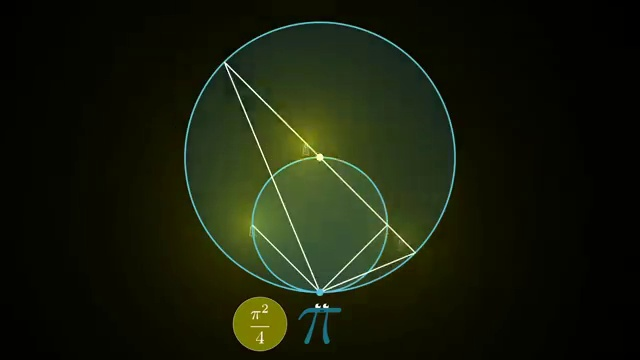

In [71]:
#paths.sort()
frames = os.listdir(test_2)



In [52]:

test_img = paths[11000]
test_output= "pixelate.png"
#library_functions.pixelate_image(paths[10000], test_output, 5)
#cog_engine(test_output)
#display_img_path("sword_outline.svg")

In [72]:
for i, test_img in enumerate(paths[10000:15000:100]):
    #test_img = paths[11000]
    test_output= f"pixelate{i}.png"
    library_functions.pixelate_image(paths[10000], test_output, 5)
    #cog_engine(test_output, test_output.replace('.png', '.svg'))
    #print("done with i", test_output)


In [63]:
#!/usr/bin/env python3
import sys
import os

svg_files = [
    '../homelab-status-page/static/lottie/frame_6831.svg',
    '../homelab-status-page/static/lottie/frame_6825.svg',
    '..//homelab-status-page/static/lottie/frame_6826.svg',
    #'/Users/shelbernstein/hashirama/services/homelab-status-page/static/lottie/frame_6827.svg',
    #'/Users/shelbernstein/hashirama/services/homelab-status-page/static/lottie/frame_6828.svg'
]

# sys.path.insert(0, os.path.join(
#     os.path.dirname(os.path.dirname(os.path.abspath(__file__))),
#     "lib"
# ))
# from lottie.importers.svg import import_svg
# from lottie.exporters.core import export_lottie
 
 
# All import/export functions can take file names or file objects
 
animation = lottie.importers.svg.import_svg(svg_files[0])
#))
 
lottie.export_lottie(animation, "open_save.json")

KeyError: 'viewBox'

In [64]:
open('../homelab-status-page/static/lottie/frame_6831.svg').read()
    

'<svg xmlns="http://www.w3.org/2000/svg"><g transform="translate(0.000000,360.000000) scale(0.100000,-0.100000)" fill="#2B2B2B" stroke="none"><path d="M480 3560 c0 -22 -4 -40 -10 -40 -6 0 -10 -47 -10 -120 0 -113 -1 -120 -20 -120 -19 0 -20 7 -20 120 0 73 -4 120 -10 120 -10 0 -18 -425 -13 -691 l3 -127 -49 -21 c-28 -12 -53 -26 -56 -31 -3 -6 -16 -10 -28 -10 -13 0 -29 -8 -38 -17 -8 -10 -28 -29 -44 -43 -33 -27 -98 -122 -109 -157 -4 -13 -11 -23 -15 -23 -4 0 -15 -26 -26 -57 -10 -32 -22 -62 -27 -68 -11 -13 -10 -47 2 -40 6 4 10 -18 10 -60 0 -48 4 -67 15 -71 8 -3 20 -21 27 -39 6 -19 15 -32 19 -29 5 2 25 -21 45 -53 20 -32 48 -72 63 -90 58 -70 71 -89 71 -107 0 -13 5 -17 20 -13 11 3 27 -1 34 -9 19 -18 42 -18 50 1 3 8 16 15 30 15 14 0 28 5 32 11 8 13 90 49 111 49 9 0 34 18 55 40 22 22 46 40 54 40 8 0 14 4 14 9 0 5 8 12 18 16 11 3 34 36 53 73 35 70 94 142 116 142 17 0 16 -13 -2 -57 -8 -19 -15 -52 -14 -72 1 -35 1 -35 10 -9 14 36 39 45 39 13 0 -18 5 -25 20 -25 12 0 20 -7 20 -16 0 -13 3 -14 13 -5 8 6 17 

In [56]:
import json
import os
import lottie

# Assuming you have the correct paths to your SVG files
svg_files = [
    '../homelab-status-page/static/lottie/frame_6831.svg',
    '../homelab-status-page/static/lottie/frame_6825.svg',
    '..//homelab-status-page/static/lottie/frame_6826.svg',
    #'/Users/shelbernstein/hashirama/services/homelab-status-page/static/lottie/frame_6827.svg',
    #'/Users/shelbernstein/hashirama/services/homelab-status-page/static/lottie/frame_6828.svg'
]

# Define function to create Lottie animation from SVG files
def create_lottie_from_svgs(svg_files, output_file):
    # Create Lottie animation object
    lottie_animation = lottie.objects.Animation(
        # width=500,
        # height=500,
        # frame_rate=30,
        # in_point=0,
        # out_point=120
    )

    # Loop through each SVG and create a shape layer
    for i, svg_path in enumerate(svg_files):
        # Correctly initialize VectorShape for the SVG path
        shape_layer = lottie.objects.ShapeLayer(
            shapes=[lottie.objects.VectorShape(d=svg_path)],  # Ensuring valid VectorShape
            name=f"Layer {i+1}",
            opacity=100,
            rotation=0
        )
        lottie_animation.add_layer(shape_layer)

    # Export Lottie animation to a file
    lottie.exporters.export_lottie(lottie_animation, output_file)

# Output file path
output_file = 'lottie_animation.json'

# Call function to create Lottie animation
create_lottie_from_svgs(svg_files, output_file)

print(f"Lottie animation saved to {output_file}")


AttributeError: module 'lottie.objects' has no attribute 'VectorShape'

In [48]:

import os
import json
from svgpathtools import svg2paths
from lottie import objects
global animation_dict

# Load and parse SVG paths
def load_svg_paths(svg_file):
    paths, attributes = svg2paths(svg_file)
    return paths, attributes

# Convert SVG paths to Lottie shapes
def svg_path_to_lottie_shape(svg_paths):
    lottie_shapes = []
    for path in svg_paths:
        lottie_shape = objects.Shape()
        for segment in path:
            if segment.__class__.__name__ == "Line":
                lottie_shape.add_command(
                    objects.commands.MoveTo(segment.start.real, segment.start.imag)
                )
                lottie_shape.add_command(
                    objects.commands.LineTo(segment.end.real, segment.end.imag)
                )
            # Add other path segment types as needed, e.g., CubicBezier, QuadraticBezier, etc.
        lottie_shapes.append(lottie_shape)
    return lottie_shapes

 
 
an = objects.Animation(59)
 
layer = objects.ShapeLayer()
an.add_layer(layer)
 



import os
import json
from svgpathtools import svg2paths
from lottie import objects
from lottie.exporters import export_lottie  # Corrected import for exporting

# Load and parse SVG paths
def load_svg_paths(svg_file):
    paths, attributes = svg2paths(svg_file)
    return paths, attributes
#objects.Path()
# Convert SVG paths to Lottie shapes
def svg_path_to_lottie_shape(svg_paths):
    lottie_shapes = []
     
    an = objects.Animation(59)
     
    layer = objects.ShapeLayer()
    an.add_layer(layer)
    for path in svg_paths:
        bez = objects.Path() # this is a path in one frame
        layer.add_shape(bez)
        for segment in path:
            #print(segment.__class__.__name__)
            if segment.__class__.__name__ == "Line":
                #print("cool", segment)
                #layer.add_shape(segment)
                bez.shape.value.add_point(Point(256, 128), Point(0, 0), Point(64, 64))
                bez.shape.value.add_point(Point(256, 256), Point(-64, -64), Point(-64, 64))
                bez.shape.value.add_point(Point(256, 256+120), Point(0, 0), Point(0, 0))
                layer.add_shape(objects.Stroke(Color(1, 0, 0), 10))
     
      # Add other path segment types as needed, e.g., CubicBezier, QuadraticBezier, etc.
        lottie_shape = lottie.objects.Shape
        lottie_shapes.append(lottie_shape)
    return lottie_shapes, an


# Create Lottie animation from multiple SVGs
def create_lottie_from_svgs(svg_files, output_file):
    lottie_animation = objects.Animation()
    for i, svg_file in enumerate(svg_files):
        paths, _ = load_svg_paths(svg_file)
        lottie_shapes = svg_path_to_lottie_shape(paths)

        layer = objects.ShapeLayer()
        #layer.shapes[0].add_keyframe(i * 5, )
        layer.add_shape(lottie_shapes)
        lottie_animation.add_layer(layer)

    # Export Lottie animation to a file
    #lottie.export_lottie
    animation_dict = lottie_animation
    #with open(output_file, 'w') as f:
    #    print(animation_dict)
    #    json.dump(animation_dict, f, indent=4)  
    #lottie.exporters.export_lottie(lottie_animation, output_file) #/// for each line of code - show 3 possible - sbustitions - 12 3
    print(lottie_animation)
    print(f"Lottie animation saved to {output_file}")
    return lottie_animation

# Run the script with your SVG files
svg_directory = 'svg/'  # Directory containing SVG files
output_file = 'lottie_animation.json'
layer.add_shape
output = create_lottie_from_svgs(svg_files, output_file)


hi = animation_dict
def save_to_disk():

    #lottie.exporters.export_lottie(lottie_animation, output_file)
    animation_dict = lottie_animation.to_dict()  # Convert Lottie object to a dictionary
    with open(output_file, 'w') as f:
        json.dump(animation_dict, f, indent=4)  

Animation
Lottie animation saved to lottie_animation.json


In [49]:
animation_dict

NameError: name 'animation_dict' is not defined

In [51]:
output.to_dict()

Exception: Unknown value <class 'lottie.objects.shapes.Shape'>

In [45]:
global animation_dict 


In [37]:
svg_files = [os.path.join(svg_directory, f) for f in os.listdir(svg_directory) if f.endswith('.svg')][0:100:5]
svg_files

['svg/output_3.svg', 'svg/output_1.svg', 'svg/output.svg']

In [39]:
lottie.exporters.export_lottie

<function lottie.exporters.core.export_lottie(animation, file, pretty=False)>

In [28]:
#from lottie import objects
# https://pypi.org/project/pypotrace/
#https://github.com/mapbox/delaunator
#https://github.com/mapbox/earcut
# https://github.com/gopherdata/gophernotes
#https://github.com/kevmo314/magic-copy
#https://github.com/Breakthrough/PySceneDetect


!  cat lottie_animation.json

cat: lottie_animation.json: No such file or directory


In [263]:
#cp checkpoints/sam2_hiera_tiny.pt .

len(sample)


25

In [209]:
from IPython.display import display, HTML

# Embedding JavaScript in HTML
display(HTML("""
<script>
    console.log('Hello from JavaScript!');
    // You can add more complex JS here
</script>
"""))

In [210]:
from IPython.display import display, Javascript

# Define a JavaScript function to create a pop-up dialog
display(Javascript("""
function showPopup(message) {
    alert(message);
}
"""))

# Call the function from Python
display(Javascript("showPopup('Hello, World!')"))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import library_functions
#library_functions.mask_generate()

#! mkdir mask_output


using device: cuda


In [21]:
display(Image(test_2 + '/' + frames[0]))

18

In [75]:
sample = [test_2 + '/' + frame for frame in frames]

In [76]:
sample = sample[10000:15000:100]
len(sample)

50

In [95]:
import os
# if using Apple MPS, fall back to CPU for unsupported ops
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image

from sam2.build_sam import build_sam2
from sam2.automatic_mask_generator import SAM2AutomaticMaskGenerator

# select the device for computation
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
print(f"using device: {device}")
if device.type == "cuda":
    # use bfloat16 for the entire notebook
    torch.autocast("cuda", dtype=torch.bfloat16).__enter__()
    # turn on tfloat32 for Ampere GPUs (https://pytorch.org/docs/stable/notes/cuda.html#tensorfloat-32-tf32-on-ampere-devices)
    if torch.cuda.get_device_properties(0).major >= 8:
        torch.backends.cuda.matmul.allow_tf32 = True
        torch.backends.cudnn.allow_tf32 = True
elif device.type == "mps":
    print(
        "\nSupport for MPS devices is preliminary. SAM 2 is trained with CUDA and might "
        "give numerically different outputs and sometimes degraded performance on MPS. "
        "See e.g. https://github.com/pytorch/pytorch/issues/84936 for a discussion."
    )
    np.random.seed(3)

def show_anns(anns, borders=True):
    if len(anns) == 0: return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:, :, 3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.5]])
        img[m] = color_mask 
        if borders:
            import cv2
            contours, _ = cv2.findContours(m.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
            # Try to smooth contours
            contours = [cv2.approxPolyDP(contour, epsilon=0.01, closed=True) for contour in contours]
            cv2.drawContours(img, contours, -1, (0, 0, 1, 0.4), thickness=1) 
        ax.imshow(img)



sam2_checkpoint = "./sam2_hiera_tiny.pt"
model_cfg = "sam2_hiera_t.yaml"

sam2 = build_sam2(model_cfg, sam2_checkpoint, device=device, apply_postprocessing=False)

# #mask_generator = SAM2AutomaticMaskGenerator(sam2)
# mask_generator_2 = SAM2AutomaticMaskGenerator(
#     model=sam2,
#     points_per_side=64,
#     points_per_batch=128,
#     pred_iou_thresh=0.7,
#     stability_score_thresh=0.92,
#     stability_score_offset=0.7,
#     crop_n_layers=1,
#     box_nms_thresh=0.7,
#     crop_n_points_downscale_factor=2,
#     min_mask_region_area=25.0,
#     use_m2m=True,
# )
sam2 = build_sam2(model_cfg, sam2_checkpoint, device=device, apply_postprocessing=False)
mask_generator = SAM2AutomaticMaskGenerator(sam2)

def mask_generate(url="../homelab-status-page/static/webcam.jpg"):
    image = Image.open(url)
    image = np.array(image.convert("RGB"))
    #
    #masks = mask_generator.generate(image)
    #print(len(masks))
    #print(masks[0].keys())
    # plt.figure(figsize=(20, 20))
    # plt.imshow(image)
    # show_anns(masks)
    # plt.axis('off')
    # plt.show()
    #masks2 = mask_generator_2.generate(image)
    # plt.figure(figsize=(20, 20))
    # plt.imshow(image)
    #show_anns(masks2)
    # plt.axis('off')
    # plt.show()
    return mask_generator.generate(image)


using device: cuda


In [94]:
#mask_generator.

In [96]:
import time

annotation_masks = {}

for _ in sample:
    start_time = time.time() 
    anno = mask_generate(_)
    annotation_masks[_] = anno
    end_time = time.time() 
    print(f"Appending chunk shit to file took {end_time - start_time:.4f} seconds.")


Appending chunk shit to file took 0.9604 seconds.
Appending chunk shit to file took 0.7384 seconds.
Appending chunk shit to file took 0.7524 seconds.
Appending chunk shit to file took 0.9389 seconds.
Appending chunk shit to file took 0.8586 seconds.
Appending chunk shit to file took 0.7422 seconds.
Appending chunk shit to file took 0.7411 seconds.
Appending chunk shit to file took 0.7494 seconds.
Appending chunk shit to file took 0.9508 seconds.
Appending chunk shit to file took 0.7450 seconds.
Appending chunk shit to file took 0.7626 seconds.
Appending chunk shit to file took 1.1585 seconds.
Appending chunk shit to file took 0.8018 seconds.
Appending chunk shit to file took 0.7427 seconds.
Appending chunk shit to file took 0.7368 seconds.
Appending chunk shit to file took 0.8562 seconds.
Appending chunk shit to file took 0.9414 seconds.
Appending chunk shit to file took 0.8358 seconds.
Appending chunk shit to file took 0.7550 seconds.
Appending chunk shit to file took 1.0450 seconds.


In [97]:
import json
import numpy as np

# Example: Convert a NumPy array to a list
def convert_to_serializable(obj):
    if isinstance(obj, np.ndarray):
        return []
    if isinstance(obj, set):
        return list(obj)
    return obj

# Use the default parameter of json.dump to call the conversion function
with open('annotations-4.json', 'w') as json_file:
    json.dump(annotation_masks, json_file, default=convert_to_serializable)


In [114]:
segments = list(annotation_masks.items())
first_frame_segments = segments[0]
first_frame_segments[0]

'youtube/output_frames/Why is pi here  And why is it squared  A geometric answer to the Basel problem/frame_20326.jpg'

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from xml.etree.ElementTree import Element, SubElement, tostring
from xml.dom.minidom import parseString

def show_anns_as_svg(anns, svg_path='output.svg', borders=True):
    if len(anns) == 0:
        return
    
    # Sort annotations by area in descending order
    sorted_anns = sorted(anns, key=lambda x: x['area'], reverse=True)
    
    # Create an SVG root element
    svg = Element('svg', xmlns="http://www.w3.org/2000/svg", version="1.1")
    
    for ann in sorted_anns:
        m = ann['segmentation']
        
        # Find contours
        contours, _ = cv2.findContours(m.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        
        # Create a path element for each contour
        for contour in contours:
            # Smooth the contour path using cv2.approxPolyDP
            contour = cv2.approxPolyDP(contour, epsilon=0.01 * cv2.arcLength(contour, True), closed=True)
            
            # Convert the contour to SVG path data
            path_data = 'M ' + ' L '.join([f'{point[0][0]} {point[0][1]}' for point in contour]) + ' Z'
            path = SubElement(svg, 'path', d=path_data)
            
            # Set random fill color
            color = f'rgb({int(np.random.randint(0, 256))},{int(np.random.randint(0, 256))},{int(np.random.randint(0, 256))})'
            path.set('fill', color)
            path.set('fill-opacity', '0.5')
            
            # Optional: Add a stroke (border) to the path
            if borders:
                path.set('stroke', 'blue')
                path.set('stroke-width', '1')
    
    # Convert the XML structure to a string
    svg_str = tostring(svg)
    pretty_svg = parseString(svg_str).toprettyxml()
    
    # Save the SVG file
    with open(svg_path, 'w') as f:
        f.write(pretty_svg)

    print(f'SVG saved to {svg_path}')

# Example usage
# Assume anns is a list of dictionaries, each with a 'segmentation' key containing a mask as a 2D ndarray.
# anns = [{'segmentation': np.random.randint(0, 2, (100, 100), dtype=np.uint8), 'area': 500}]
# show_anns_as_svg(anns, 'output.svg')


In [139]:
! pip install svglottie


ERROR: Could not find a version that satisfies the requirement svglottie (from versions: none)
ERROR: No matching distribution found for svglottie


In [141]:
import os
def showAnnotation(url):
    print(url)
    image = Image.open(url)
    plt.figure(figsize=(20, 20))
    plt.imshow(image)
    fp = os.path.split(url)[-1]
    show_anns_as_svg(annotation_masks[url],  f"output_{fp}.svg")
    plt.axis('off')
    plt.show()
    plt.savefig("shit", bbox_inches='tight', pad_inches=0)
    #plt.off()

#for url in annotation_masks:
    #print(url)

    #showAnnotation(url)
#show_anns()

In [98]:
import numpy as np
import os

#file_path = '/path/to/your/file/example.txt'
#print(file_name)  

for annotion in annotation_masks:
    masks = annotation_masks[annotion]
    file_name = os.path.basename(annotion)
    for i, category in enumerate(masks):

        np.save(f"./annotations/{file_name}-{i}.npy", category['segmentation'])
#! mkdir annotations

In [46]:
# 2 anime - ouran lightbulb + find another
# 2 brown 2 blue - 
# 2 logos 
#
annotation_map = { "why is pi here": 4,
                 "cone": 2}
annotation_masks['youtube/output_frames/cone_to_ellipse/frame_10000.jpg']

[{'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 26,
  'bbox': [203.0, 128.0, 5.0, 4.0],
  'predicted_iou': 0.8125,
  'point_coords': [[208.359375, 131.796875]],
  'stability_score': 0.9615384340286255,
  'crop_box': [0.0, 0.0, 381.0, 241.0]},
 {'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 68,
  'bbox': [244.0, 65.

In [219]:
def main():
    for tolerance in (0, 64, 128, 256, 512):
        # first iteration will take a long time because there are many colors
        dir_path, image_name = path.split(FIREBALL_PNG_PATH)
        print(f'Converting {image_name} with color tolerance: {tolerance}')
        with catchtime():
            svg_img = pixels2svg(FIREBALL_PNG_PATH,
                                 color_tolerance=tolerance)
        output_path = path.join(dir_path,
                                image_name.replace(
                                    '.png', f'_tolerance_{tolerance}.svg'))
        svg_img.save_to_path(output_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import ipywidgets as widgets
from IPython.display import display, Javascript

# Step 1: Load earcut.js
display(Javascript("""
    if (typeof earcut === 'undefined') {
        var script = document.createElement('script');
        script.src = 'https://cdn.jsdelivr.net/npm/earcut@2.2.2/dist/earcut.min.js';
        document.head.appendChild(script);
    }
"""))

# Step 2: Define the triangulatePolygon function in JavaScript
display(Javascript("""
    function triangulatePolygon(vertices) {
        return earcut(vertices);
    }
"""))

# Step 3: Output widget for displaying results
output = widgets.Output()
display(output)

# Step 4: Function to pass data to JavaScript and return results
def triangulate(vertices):
    vertices_str = str(vertices)
    display(Javascript("""
    import earcut from 'https://cdn.jsdelivr.net/npm/earcut/+esm';
       function triangulatePolygon(vertices) {
            return earcut(vertices);
        }

        var vertices = """+vertices_str+""";
        var result = triangulatePolygon(vertices);
        console.log(result);
        IPython.notebook.kernel.execute(`triangulated_data = ${{JSON.stringify(result)}}`);
    """))

# Step 5: Define the vertices of a polygon and run the function
polygon_vertices = [10, 0, 0, 50, 60, 60, 70, 10]
triangulate(polygon_vertices)

# Step 6: Output the results from JavaScript to Python
# output.clear_output()
# with output:
#     print(triangulated_data)  # This variable is set in the kernel by JavaScript

import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

# Create some random points
points = np.random.rand(10, 2)

# Triangulate the points
tri = Delaunay(points)

# Plot the triangulation
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
#plt.show()

In [ ]:
#! jupyter nbextension enable --py widgetsnbextension


In [202]:
svg_file = "lottie_2/pixelate10.svg"
paths, attributes = svg2paths(svg_file)
lottie_shapes = []
an = objects.Animation(59)
layer = objects.ShapeLayer()
an.add_layer(layer)
for path in paths:
    lottie_shape = objects.Shape() # this is a path in one frame
    #layer = lottie_shape.add_layer()
    bez   = layer.add_shape(objects.Path())
    for segment in path:
        #print(segment.__class__.__name__)
        if segment.__class__.__name__ == "Line":
            bez.shape.value.add_point(Point(256, 128), Point(0, 0), Point(64, 64))
            bez.shape.value.add_point(Point(256, 256), Point(-64, -64), Point(-64, 64))
            bez.shape.value.add_point(Point(256, 256+120), Point(0, 0), Point(0, 0))
            layer.add_shape(objects.Stroke(Color(1, 0, 0), 10))
 
            #segment.start[0]
            #print("cool", segment)
            #layer.add_shape(segment)

  # Add other path segment types as needed, e.g., CubicBezier, QuadraticBezier, etc.
    lottie_shapes.append(lottie_shape)
#lottie_shapes, an

In [199]:
path

In [206]:
an.layers


[<ShapeLayer 0 None>]

In [204]:
lottie.exporters.export_lottie(an, "animation.json")

In [ ]:
#lottie.exporters.export_embedded_html(output, "animation.html")


In [179]:

from lottie.utils import script
from lottie import objects
from lottie import Point, Color

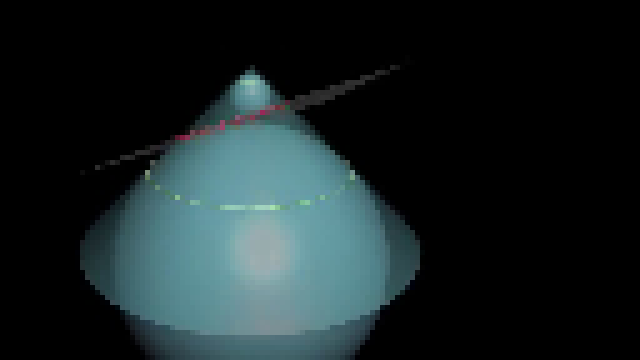

In [152]:
from pixels2svg import Drawing, pixels2svg
test_output= f"pixelate{1}.png"
display_img_path(test_output.replace('png', 'svg'))

In [149]:
#paths[10000:15000:100]

In [124]:


def convert_pixelated_to_svg(SPACESHIPS_PNG_PATH, output_path):
    svg_img = pixels2svg(SPACESHIPS_PNG_PATH,
                         remove_background=True)
    output_path = path.join(output_path)
    svg_img.save_to_path(output_path)
    return svg_img


output = convert_pixelated_to_svg("pixelate.png", "output.svg")

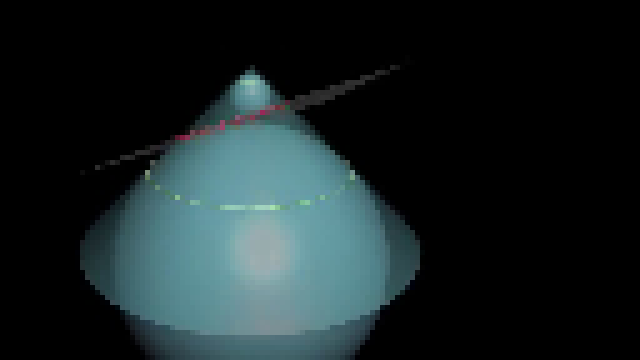

In [118]:
#! pip install lottie svgpathtools

import os
import json
from svgpathtools import svg2paths
from lottie import objects, export

ImportError: cannot import name 'export' from 'lottie' (/home/adnan/micromamba/envs/sam/lib/python3.10/site-packages/lottie/__init__.py)

In [114]:
from os import path
import os
from pixels2svg import pixels2svg
#ass_dir = 'Easy Falling Leaves - Adobe After Effects tutorial/'
#base_dir = 'youtube/output_frames/'
#source_dir = base_dir + ass_dir
#list_img_to_svg = os.listdir(source_dir)
#print ('img count ', len(list_img_to_svg))
#shit_dir = os.listdir(ass_dir)
#i = len(shit_dir)
#print(i)
def convert_pixelated_to_svg(SPACESHIPS_PNG_PATH, output_path):
    svg_img = pixels2svg(SPACESHIPS_PNG_PATH,
                         remove_background=True)
    output_path = path.join(output_path)
    svg_img.save_to_path(output_path)
    return output


In [63]:
from IPython.display import display, SVG

# Path to your SVG file
svg_file_path = './spaceships.svg'
svg_file_path = 'output_image_improved.svg'

# Display the SVG file
#display(SVG(filename=svg_file_path))


In [16]:
# process images = 

# label frames -> dsicard non needed
# semantic segemenatiaon -> discard pixels not neded 
# someconvert from bitmap to svg -> triangulate using earcut 



# for image in os.listdir('youtube/output_frames/ohshc__Finding_out_Haruhi_is_a_girl/')[:5]:
  
#     #img = PILImage.open(f"output_frames/ohshc__Finding_out_Haruhi_is_a_girl/{image}")
#     print(image)
#     mask_generate(image)
#     #mask_generate(f"output_frames/ohshc__Finding_out_Haruhi_is_a_girl/{image}")
#     #display(img)
#     time.sleep(3)

#test_display = 'output_frames/ohshc__Finding_out_Haruhi_is_a_girl/frame_00428.jpg'
# Open and display the image
#img = PILImage.open(test_display)
#display(img)



In [76]:
import cv2
import numpy as np
import os
import svgwrite

# Load the image using OpenCV

def masks_to_svg(image_path):
    #image_path = '/mnt/data/image.png'  # Path to your image
    #return 
    print(image_path)
    image = cv2.imread(f"youtube/semseg/ohshc__Finding_out_Haruhi_is_a_girl/{image_path}")
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply edge detection or thresholding to simplify the image
    ret, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
    
    # Find contours in the image
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create an SVG drawing
    svg_filename = 'youtube/svg/' + image_path.replace('.jpg', '.svg')
    dwg = svgwrite.Drawing(svg_filename, profile='tiny')
    
    # Define the size of the SVG canvas
    height, width = image.shape[:2]
    dwg.viewbox(width=width, height=height)
    
    # Iterate through each contour and convert it to an SVG path
    for contour in contours:
        # Simplify the contour
        approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
        
        # Create SVG path data
        path_data = []
        for point in approx:
            x, y = point[0]
            path_data.append(f'L{x},{y}')
        
        # Start path from the first point
        if path_data:
            path_data[0] = path_data[0].replace('L', 'M')  # Replace the first 'L' with 'M'
        
        # Join path data into a single string and close the path
        path_str = ' '.join(path_data) + ' Z'
        
        # Add the path to the SVG
        dwg.add(dwg.path(d=path_str, fill='none', stroke='black', stroke_width=1))
    
    # Save the SVG file
    dwg.save()
    
    print(f"SVG saved as {svg_filename}")

masks = os.listdir('youtube/semseg/ohshc__Finding_out_Haruhi_is_a_girl/')

#os.listdir('youtube/semseg/ohshc__Finding_out_Haruhi_is_a_girl/')
# for mask in masks: 
#     masks_to_svg(mask)
masks

['frame_01268.jpg',
 'frame_00428.jpg',
 'frame_00049.jpg',
 'frame_01609.jpg',
 'frame_00098.jpg']

In [75]:

def masks_to_svg(image_path):
    # Check if the file exists and can be opened
    if not os.path.exists(image_path):
        print(f"Error: File {image_path} not found.")
        return
    
    # Read the image
    image = cv2.imread(image_path)
    
    # Ensure the image was loaded successfully
    if image is None:
        print(f"Error: Could not load image {image_path}.")
        return

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to smooth the image and reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Adjust thresholding to detect stronger edges
    ret, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)

    # Find contours in the image
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter out small contours by area
    min_contour_area = 100  # You can adjust this value to remove smaller details
    contours = [c for c in contours if cv2.contourArea(c) > min_contour_area]

    # Create an SVG drawing
    svg_filename = 'output_image_improved.svg'
    dwg = svgwrite.Drawing(svg_filename, profile='tiny')

    # Define the size of the SVG canvas
    height, width = image.shape[:2]
    dwg.viewbox(width=width, height=height)

    # Iterate through each contour and convert it to an SVG path
    for contour in contours:
        # Simplify the contour
        approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
        
        # Create SVG path data
        path_data = []
        for point in approx:
            x, y = point[0]
            path_data.append(f'L{x},{y}')
        
        # Start path from the first point
        if path_data:
            path_data[0] = path_data[0].replace('L', 'M')  # Replace the first 'L' with 'M'
        
        # Join path data into a single string and close the path
        path_str = ' '.join(path_data) + ' Z'
        
        # Add the path to the SVG
        dwg.add(dwg.path(d=path_str, fill='none', stroke='black', stroke_width=1))

    # Save the SVG file
    dwg.save()

    print(f"SVG saved as {svg_filename}")

# Example usage
test_image = 'youtube/semseg/ohshc__Finding_out_Haruhi_is_a_girl/frame_00049.jpg'
#image_path = 'path_to_your_image.png'
_ = masks_to_svg(test_image)
_

SVG saved as output_image_improved.svg


In [47]:
# #! pwd
# references at bottom

# print(cv2.getBuildInformation())
#! pip install watchdog
# hard + vlauable + fun (focus so single pointedly - evertything else fades away)
# bookish like crodelia - yoga/tech like olvia or abby, 
# you know what you are now a bit - so you wont have any issues 
# look dont matter - behavior, leadership, self-ctornol, happy-mind, lifestyle = these are the foundation of a  happy relationship

#youtube_86_motiongraphics_playlist  = 'https://www.youtube.com/playlist?list=PL79TBmLa4lTTq9w7AYjaLo9RSXkzrihVY'
#xml_pase = 'https://myanimelist.net/rss.php?type=rw&u=rimmjob'

# first -> dice ~100 papers, anime, youtube into frames
# -> use vision transformer to label them


# use 100 blogs -> use flux
# get 100 prompts from 100 research papers 
# get 100 prompts from 100 anime 
# get 100 prompts from 100 youtube
# prompts = label
# prompt to gif + lottie


# from transformers import ViTFeatureExtractor, ViTForImageClassification
# from PIL import Image
# import torch

# # Load the pre-trained Vision Transformer model and feature extractor
# model_name = 'google/vit-base-patch16-224'  # You can choose a different model as well
# feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)
# model = ViTForImageClassification.from_pretrained(model_name)

# # Set model to evaluation mode
# model.eval()



# def preprocess_frame(frame):
#     # Convert the frame to PIL Image
#     image = Image.fromarray(frame)
    
#     # Use the feature extractor to preprocess the image
#     inputs = feature_extractor(images=image, return_tensors="pt")
    
#     return inputs['pixel_values']



# def label_frame(frame):
#     # Preprocess the frame
#     inputs = preprocess_frame(frame)
    
#     # Forward pass through the model
#     with torch.no_grad():
#         outputs = model(inputs)
    
#     # Get the predicted class
#     predicted_class_idx = outputs.logits.argmax(-1).item()
#     predicted_class_label = model.config.id2label[predicted_class_idx]
    
#     return predicted_class_label

# # Example usage
# import cv2
# video_path = "path_to_your_video.mp4"
# cap = cv2.VideoCapture(video_path)

# while cap.isOpened():
#     ret, frame = cap.read()
#     if not ret:
#         break

#     # Get the label for the current frame
#     label = label_frame(frame)
#     print(f"Frame Label: {label}")

# cap.release()


# def label_frames_in_batch(frames):
#     # Convert list of frames to list of PIL images
#     images = [Image.fromarray(frame) for frame in frames]

#     # Preprocess the batch of images
#     inputs = feature_extractor(images=images, return_tensors="pt")

#     # Forward pass through the model
#     with torch.no_grad():
#         outputs = model(**inputs)
    
#     # Get the predicted classes
#     predicted_classes = outputs.logits.argmax(-1).tolist()
#     labels = [model.config.id2label[idx] for idx in predicted_classes]
    
#     return labels

# # Example usage for batch processing
# frames = [...]  # List of frames (images)
# labels = label_frames_in_batch(frames)
# for frame, label in zip(frames, labels):
#     print(f"Frame Label: {label}")
# get jp a prompt to animation api -> 5 animations - 4 hours - end at 6:30
# new hashirama.com = animation api  - static caddy hashirama.html
#  parse papers -> get summaries  -> sentence -> gif
# youtube / audio -> summarizier -> make giffs out of sentences
# type blog = asldfkasdlfkasf -> every kepress = new gif -> edit the pile of gifs and share them
# use flux + all tricks 
#image
#! wget https://silverfallsseed.com/wp-content/uploads/2015/12/cOSMOS-dAYDREAM-FIELD-20201-PETES-14.jpg

#! mv  cOSMOS-dAYDREAM-FIELD-20201-PETES-14.jpg flower

#! mv flower flower.jpg

# fix for multi-day block - dont get blocked #1 rule -> files were empty -> fix = put files in fiels.hashirama -> look at them 
#! python -c "import cv2; print(cv2.getBuildInformation())" | grep -i ffmpeg
#! pip install opencv-contrib-python 
# semantic seam carving - find arreas of high information entropy  or manual insert keysframs
# downlaod video
# slice input to frames
# use semseg to get objects 
# img -> svg
# squish into a lottie 
#! pip install pytubefix
#https://github.com/pytube/pytube/issues/1894
# _default_clients["ANDROID"]["context"]["client"]["clientVersion"] = "19.08.35"
# _default_clients["IOS"]["context"]["client"]["clientVersion"] = "19.08.35"
# _default_clients["ANDROID_EMBED"]["context"]["client"]["clientVersion"] = "19.08.35"
# _default_clients["IOS_EMBED"]["context"]["client"]["clientVersion"] = "19.08.35"
# _default_clients["IOS_MUSIC"]["context"]["client"]["clientVersion"] = "6.41"
# _default_clients["ANDROID_MUSIC"] = _default_clients["ANDROID_CREATOR"]
# # where to save 
# can you use similar pipelines for lottie+robot
#os.listdir('/home/adnan')
#display_img('~/segment-anything-2/output.gif')
# link of the video to be downloaded 
# using a gif - or an svg -> can use calculus to reverse engineer the data
# or the function or the scales  - see today and tomororw = slope for ???
# instantenous rate of chane
# 
#!micromamba  install yt-dlp
#!pip install pytube moviepy
#apple = 'https://www.youtube.com/watch?v=cwCMV7LF6S4'
#'https://www.youtube.com/watch?v=dQw4w9WgXcQ'
#'?si=BvAYyjbT4dkoiM1E'
#YouTube URL -> Select object / shapes via segmentanything2 -
# > convert filtered video to frames -> for each frame convert to svg 
#-> svg + lottie transport = good? 

#deliveraves 
#1. apple - trust / stripe
#2. 10 logos - trust / stripe
#3. lgihtbulb - anime
#4. flower -  anime
#5. kensshin - anime
#6. https://youtu.be/WUvTyaaNkzM?si=EXjJZgRb4nO4yOFi - math vis 
#7. ??? (didactism, 
# have segment 2 anything working

# 1. adding a video

# 2. then splitting into frames

# 3. Then using segment to extract objects

# 4. Then converting the animation to svg

# 5. Then animation to lottie. 
#https://replicate.com/collections/utilities
#https://replicate.com/collections/image-editing
#https://huggingface.co/docs/diffusers/main/en/api/pipelines/flux
#https://huggingface.co/black-forest-labs/FLUX.1-schnell/discussions/5#:~:text=Depends%20how%20fast%20you%20want,%2D%202%20bytes%20%2F%20param)).

# Display the SVG
#display(SVG(filename=svg_path))
#https://jupyterlab.readthedocs.io/en/stable/user/extensions.html
#https://github.com/jpmorganchase/python-training
# https://github.com/observablehq/framework/blob/main/docs/lib/mosaic.md
# https://docs.jupyter.org/en/latest/projects/incubator.html
# https://www.ycombinator.com/companies/srcbook
# https://www.ycombinator.com/companies/neptyne
# https://github.com/dformoso/machine-learning-mindmap
# https://www.fast.ai/
# https://blog.jupyter.org/generative-ai-in-jupyter-3f7174824862
# https://github.com/jupyterlab/jupyter-ai
# https://app.lottiefiles.com/
# https://news.ycombinator.com/item?id=41234424
# https://creator.lottiefiles.com/?fileId=538b752c-2972-457d-9d49-64947206479b
# https://github.com/fireship-io/animated-svg-demo
# https://svg.io/download/2e62e1ed-b403-4137-b2b3-00221fa2994e
# https://www.domoai.app/home?_gl=1*xxzt2g*_gcl_au*MTAzNjg0NTQzOS4xNzI2NjM5Nzg0


# hopefully should be done in 2 hours
#import pixels2svg
#dir(   pixels2svg.__version__)
# https://github.com/ValentinFrancois/pixels2svg/blob/main/examples/sword_outline.py
# https://potrace.sourceforge.net/
# https://github.com/ValentinFrancois/pixels2svg/blob/main/examples/sword_outline.py
# https://www.google.com/search?q=sentence+transformers&oq=sentence+transformers&sourceid=chrome&ie=UTF-8
# https://catherineh.github.io/programming/2018/04/04/pngs-to-embroidery-patterns
# https://threejs.org/examples/?q=webgpu#webgpu_postprocessing_transition

#https://replicate.com/explore?latest_models_page=2#latest-models

In [ ]:
"0:06 xubliminal 0:15 orthly  0:19 byter 0:23 reddit 0:30 plane 0:34 ignition 0:38 morrison brewery 0:47 allvit 0:56 upbound 1:03 pigeon post 1:08 bitmoji 1:12 ticket seats 1:18 paperplane games 1:25 sendinblue 1:32 beats"